# José Mtanous A00169781
#### Actividad Semanal -- 6, visualización

1. Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 
1. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()
1. Limpia los datos eliminando los registros nulos o rellena con la media de la columna
1. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión
1. Realiza el conteo de las variables categóricas
1. Escala los datos, si consideras necesario
1. Reduce las dimensiones con PCA, si consideras necesario.
1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
1. Indica la importancia de las variables en cada componente
1. Elabora los histogramas de los atributos para visualizar su distribución
1. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
1. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

In [16]:
# cargamos la librerías
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt


#### Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí.

In [2]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(url)

In [3]:
# Vamos a ponerle nombres más legibles a las columas segun la descripción
columns = ['id', 'monto', 'genero', 'educacion', 'estadoCivil', 'edad', 
           'estadoCuenta1', 'estadoCuenta2', 'estadoCuenta3', 'estadoCuenta4','estadoCuenta5', 'estadoCuenta6',
           'saldo1', 'saldo2', 'saldo3', 'saldo4', 'saldo5', 'saldo6',
           'pago1', 'pago2', 'pago3', 'pago4', 'pago5', 'pago6',
           'Y']

df.columns = columns
df.head()

,id,monto,genero,educacion,estadoCivil,edad,estadoCuenta1,estadoCuenta2,estadoCuenta3,estadoCuenta4,...,saldo4,saldo5,saldo6,pago1,pago2,pago3,pago4,pago5,pago6,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [4]:
# La columna ID no contiene información relevante para nuestro anáñisis
# así que la vamos a eliminar de nuestro dataFrame.
df = df.drop(['id'], axis=1)


#### Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [5]:
print('-------------df.shape-----------')
print(df.shape)

print('-------------df.columns-----------')
print(df.columns)

print('-------------df.head()-----------')
print(df.head())

print('-------------df.dtypes-----------')
print(df.dtypes)

print('-------------df.info()-----------')
print(df.info())

print('-------------df.isna()-----------')
print(df.isna())

-------------df.shape-----------
(30000, 24)
-------------df.columns-----------
Index(['monto', 'genero', 'educacion', 'estadoCivil', 'edad', 'estadoCuenta1',
       'estadoCuenta2', 'estadoCuenta3', 'estadoCuenta4', 'estadoCuenta5',
       'estadoCuenta6', 'saldo1', 'saldo2', 'saldo3', 'saldo4', 'saldo5',
       'saldo6', 'pago1', 'pago2', 'pago3', 'pago4', 'pago5', 'pago6', 'Y'],
      dtype='object')
-------------df.head()-----------
    monto  genero  educacion  estadoCivil  edad  estadoCuenta1  estadoCuenta2  \
0   20000     2.0        2.0          1.0  24.0            2.0            2.0   
1  120000     2.0        2.0          2.0  26.0           -1.0            2.0   
2   90000     2.0        2.0          2.0  34.0            0.0            0.0   
3   50000     2.0        2.0          1.0  37.0            0.0            0.0   
4   50000     1.0        2.0          1.0  57.0           -1.0            0.0   

   estadoCuenta3  estadoCuenta4  estadoCuenta5  ...   saldo4   saldo5  \

#### Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [6]:
# revisemos si tenemos nulos
print(df.isnull().values.any())
# Como si tenemos nulos, vamos a eliminarlos
df.dropna(inplace=True)
print(df.isnull().values.any())

True
False


#### Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [26]:
# Describe nos permite inspeccionar rápidamente nuestros datos.
# Por defecto describe usa los datos númericos, sin embargo, en nuestro dataset
# todos los datos son numéricos ya que las columnas categóricas feron convertidas
# a enteros.

# Describe nos da medidas de tendencia central y dispersión
# Con describe podemos ver el promedio de los datos (mean)
# y la mediana (50% percentil)
# también nos da medidas de dispersión como la desviación estándar (std) y los otros cudrantes de percentil
# con estos datos podemos ver rápidamente si nuestros features siguen una distribución simétrica o si están cargados
# hacia los valores bajos o altos.


df.describe()

,monto,genero,educacion,estadoCivil,edad,estadoCuenta1,estadoCuenta2,estadoCuenta3,estadoCuenta4,estadoCuenta5,...,saldo4,saldo5,saldo6,pago1,pago2,pago3,pago4,pago5,pago6,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


#### Realiza el conteo de las variables categóricas

In [8]:
# En la descriopción de los datos podemos ver cuales variables son categóricas
# y cuales son numéricas
# Sin embarto voy a aplicar un conteo rápido de los valores únicos de los features.
# si el número de valores únicos es menor que 20 voy a considerar que la variable es categórica
columnasCategoricas = []
columnasNumericas = []
for feature in df.columns:
    if df[feature].unique().size <= 20:
        columnasCategoricas.append(feature)
        print(feature,'tiene ',df[feature].unique().size, ' valores unicos y la consideraremos como categórica')
    else:
        columnasNumericas.append(feature)

genero tiene  2  valores unicos y la consideraremos como categórica
educacion tiene  7  valores unicos y la consideraremos como categórica
estadoCivil tiene  4  valores unicos y la consideraremos como categórica
estadoCuenta1 tiene  11  valores unicos y la consideraremos como categórica
estadoCuenta2 tiene  11  valores unicos y la consideraremos como categórica
estadoCuenta3 tiene  11  valores unicos y la consideraremos como categórica
estadoCuenta4 tiene  11  valores unicos y la consideraremos como categórica
estadoCuenta5 tiene  10  valores unicos y la consideraremos como categórica
estadoCuenta6 tiene  10  valores unicos y la consideraremos como categórica
Y tiene  2  valores unicos y la consideraremos como categórica


#### Reduce las dimensiones con PCA, si consideras necesario.

In [9]:
# Es recomendable usar PCA para reducir features dimensiones numéricas
# en este caso muchas tenemos 9 dimensiones categóricas y 14 numéricas
# Para poder hacer análisis de componentes principales voy a generar una copia
# de los datos originales pero solo de los features numéricos
dfNumeric = df[columnasNumericas]
dfNumeric.head()

,monto,edad,saldo1,saldo2,saldo3,saldo4,saldo5,saldo6,pago1,pago2,pago3,pago4,pago5,pago6
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


#### Escala los datos, si consideras necesario

In [10]:
# PCA es sensible a las escalas relativas de los datos, así que es necesrio rescalarlos.
# El rescalamiento que voy a usar es z-mean, esto es muy conveniente porque permite
# visualizar facilemnte outliers y graficar los features con la misma escala.

dfNumericNormalized = dfNumeric.apply(zscore)
dfNumericNormalized.head()

,monto,edad,saldo1,saldo2,saldo3,saldo4,saldo5,saldo6,pago1,pago2,pago3,pago4,pago5,pago6
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


#### Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [11]:
from sklearn.decomposition import PCA

# Hacemos la descomposición en componentes principales
pca = PCA(n_components=len(dfNumericNormalized.columns))

pca.fit(dfNumericNormalized)

# Ahora crearemos una tabla con los valores de varianza y varianza acumulada de cada componente
# La idea es ver claramente cuantos componentes podemos que contengan la mayor parte de la variabilidad de los
# datos originales.

pcsSummary = pd.DataFrame({'Desviación Estandard': np.sqrt(pca.explained_variance_),
                          'Varianza': pca.explained_variance_ratio_,
                          'Varianza acumulada': np.cumsum(pca.explained_variance_ratio_),
                          'Varianza perdida': 1 - np.cumsum(pca.explained_variance_ratio_) 
                          }
                          )
pcsSummary
pcsSummary_df = pcsSummary

#pcsSummary_df['PC']= ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]

row_names = np.array(['PC{}'.format(i) for i in range(1, len(dfNumericNormalized.columns) + 1)])
pcsSummary.index = row_names
pcsSummary.round(4)

,Desviación Estandard,Varianza,Varianza acumulada,Varianza perdida
PC1,2.4329,0.4228,0.4228,0.5772
PC2,1.3099,0.1226,0.5453,0.4547
PC3,1.0223,0.0746,0.6200,0.3800
PC4,0.9619,0.0661,0.6861,0.3139
PC5,0.9401,0.0631,0.7492,0.2508
PC6,0.9342,0.0623,0.8115,0.1885
PC7,0.8830,0.0557,0.8672,0.1328
PC8,0.8524,0.0519,0.9191,0.0809
PC9,0.8410,0.0505,0.9696,0.0304
PC10,0.5142,0.0189,0.9885,0.0115


In [ ]:
# Aquí podemos ver que los 5 primeros componentes principales representan el 74.92% de la variabilidad del set de datos original	

#### Indica la importancia de las variables en cada componente

In [12]:
pcaDecom = pd.DataFrame(pca.components_, columns=dfNumericNormalized.columns)
pcaDecom.insert(loc=0,column='PC',value=range(1, len(dfNumericNormalized.columns) + 1))
pcaDecom

,PC,monto,edad,saldo1,saldo2,saldo3,saldo4,saldo5,saldo6,pago1,pago2,pago3,pago4,pago5,pago6
0,1,0.165507,0.032789,0.372446,0.383253,0.388264,0.391557,0.388505,0.380672,0.135120,0.116768,0.128056,0.116903,0.113741,0.105481
1,2,0.300709,0.071906,-0.190793,-0.174644,-0.126883,-0.120403,-0.105928,-0.094157,0.383194,0.408391,0.392339,0.349613,0.303923,0.323529
2,3,-0.378575,-0.869471,-0.034207,-0.001814,0.034747,0.034073,0.033882,0.018489,0.173845,0.200925,0.122065,0.062272,-0.060900,-0.050896
3,4,-0.200103,0.338990,-0.063899,0.007629,0.060528,0.074774,0.039553,-0.070616,0.362055,0.345745,0.244688,-0.094736,-0.609833,-0.365692
4,5,0.035312,-0.039760,0.041391,0.083164,0.113790,0.028378,-0.106756,-0.164986,0.225652,0.148714,-0.239600,-0.577791,-0.193395,0.659155
5,6,-0.078883,0.071461,-0.043987,-0.028824,0.099239,0.014527,-0.099290,0.069272,0.040574,0.408361,-0.108158,-0.500809,0.602388,-0.409151
6,7,0.111239,-0.078816,0.008169,-0.032444,-0.121162,0.126494,-0.007584,0.007892,-0.201646,-0.278835,0.785216,-0.462241,0.014301,0.025459
7,8,-0.046381,0.027368,0.009341,-0.135636,0.093077,0.039157,0.049781,-0.000282,-0.748694,0.578491,0.068216,0.077764,-0.164877,0.181276
8,9,-0.821996,0.330346,0.010348,0.016872,-0.018607,0.019109,0.023701,0.058701,0.019949,-0.110712,0.152990,0.098813,0.252920,0.316686
9,10,-0.029201,-0.009011,0.566716,0.386872,0.122863,-0.205260,-0.419992,-0.488861,-0.056581,0.050854,0.144908,0.124098,0.060003,-0.099178


#### Elabora los histogramas de los atributos para visualizar su distribución

array([[<AxesSubplot:title={'center':'monto'}>,
        <AxesSubplot:title={'center':'edad'}>,
        <AxesSubplot:title={'center':'saldo1'}>,
        <AxesSubplot:title={'center':'saldo2'}>],
       [<AxesSubplot:title={'center':'saldo3'}>,
        <AxesSubplot:title={'center':'saldo4'}>,
        <AxesSubplot:title={'center':'saldo5'}>,
        <AxesSubplot:title={'center':'saldo6'}>],
       [<AxesSubplot:title={'center':'pago1'}>,
        <AxesSubplot:title={'center':'pago2'}>,
        <AxesSubplot:title={'center':'pago3'}>,
        <AxesSubplot:title={'center':'pago4'}>],
       [<AxesSubplot:title={'center':'pago5'}>,
        <AxesSubplot:title={'center':'pago6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

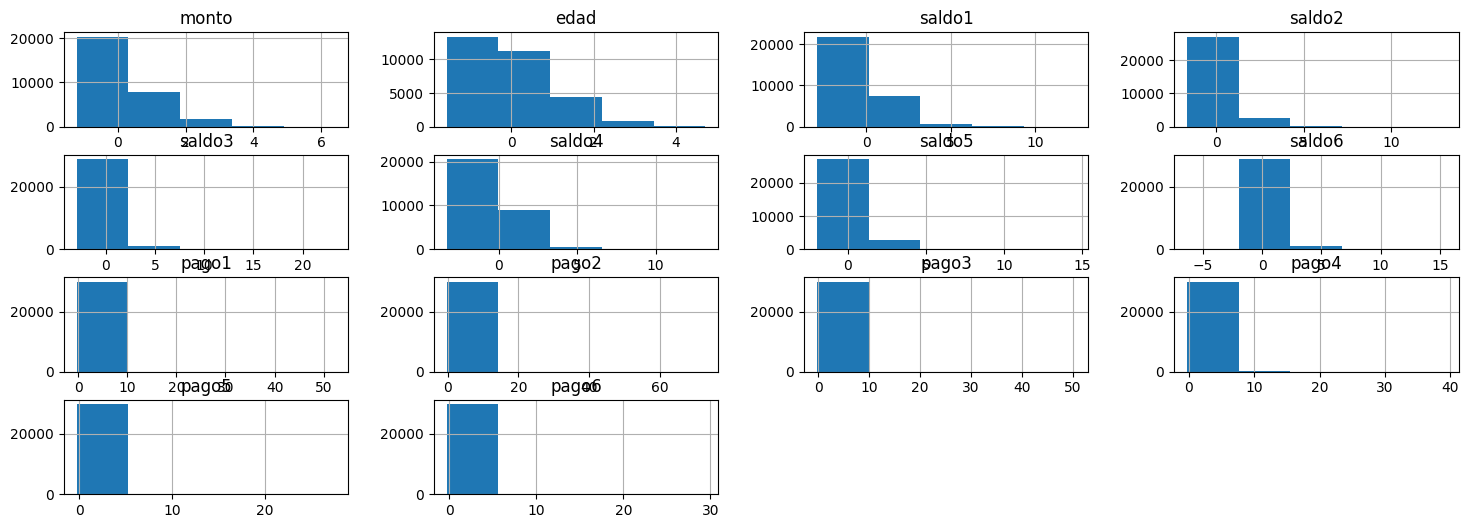

In [13]:
dfNumericNormalized.hist(figsize=(18, 6), bins=5)

#### Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
#### Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

BoxPlot
Podemos una gráfica de caja y bigotes para ver como están distribuidos nuestros datos. Aquí grafiqué los features numéricos normalizados de nuestro conjunto de datos y es muy claro que los datos no están distribiidos de manera simétrica
alrededor de un valor central. Con está visulización podemos concluir que podríamos aplicar una transformación adicional nuestros features para equilibrarlos mejor, por ejemplo podríamos aplicar una transformación logarítmica.

<AxesSubplot:>

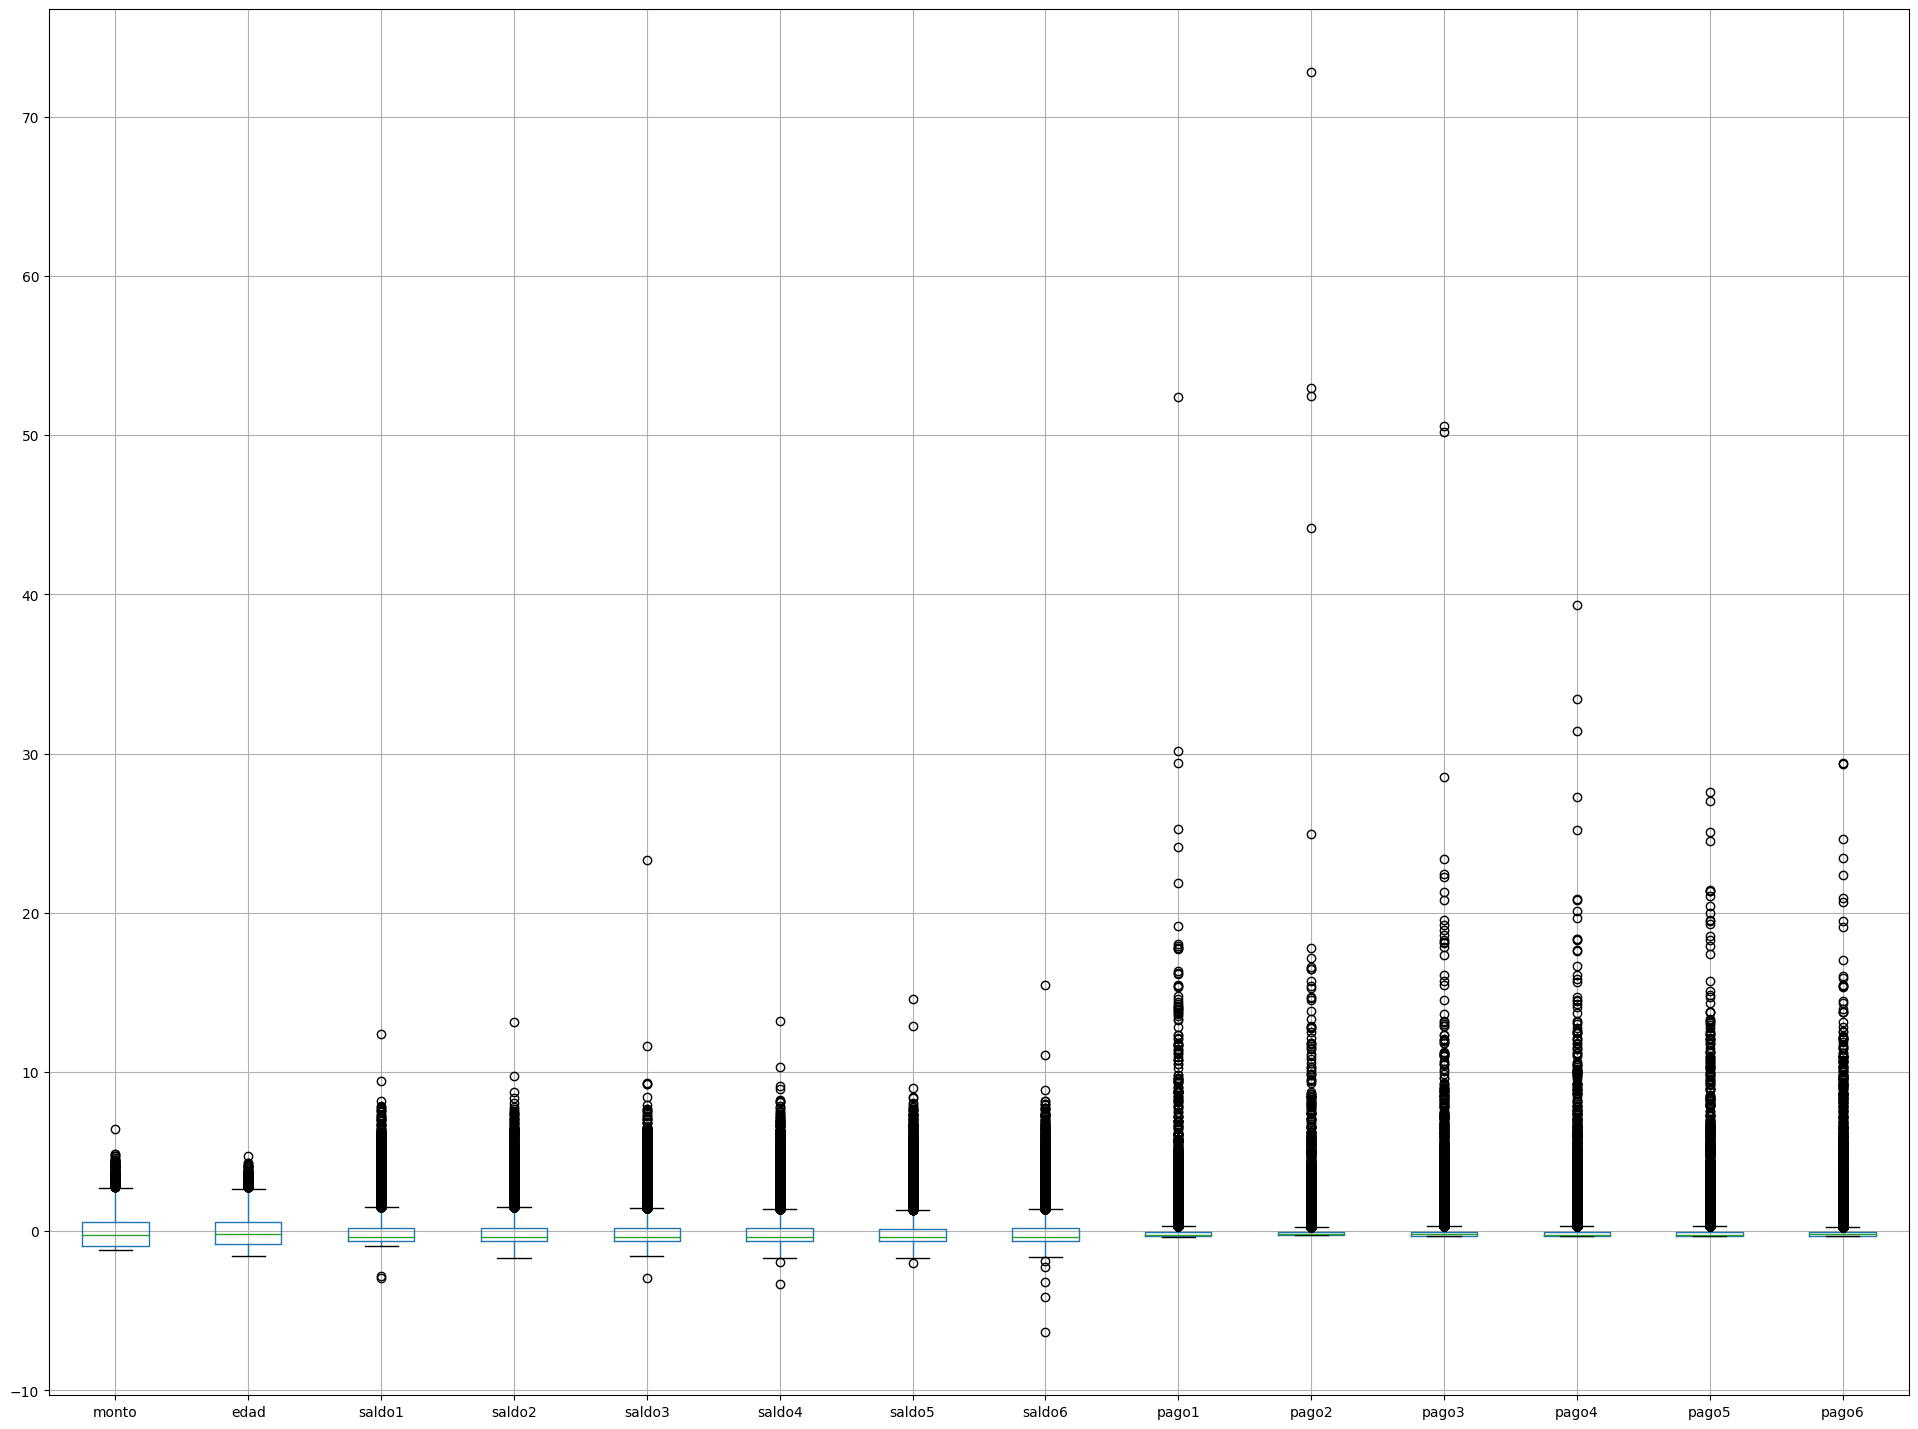

In [14]:
#
dfNumericNormalized.boxplot(figsize=(24, 18))

Gráfica Scree
Una manera fácil y rápuda de visulizar la contribución de variabilidad de cada componente principal es usando una gráfica Scree. Rápidamente podemos ver que a partir del noveno componente ya tenemos acumulada casi
la totalidad de la variabilidad.

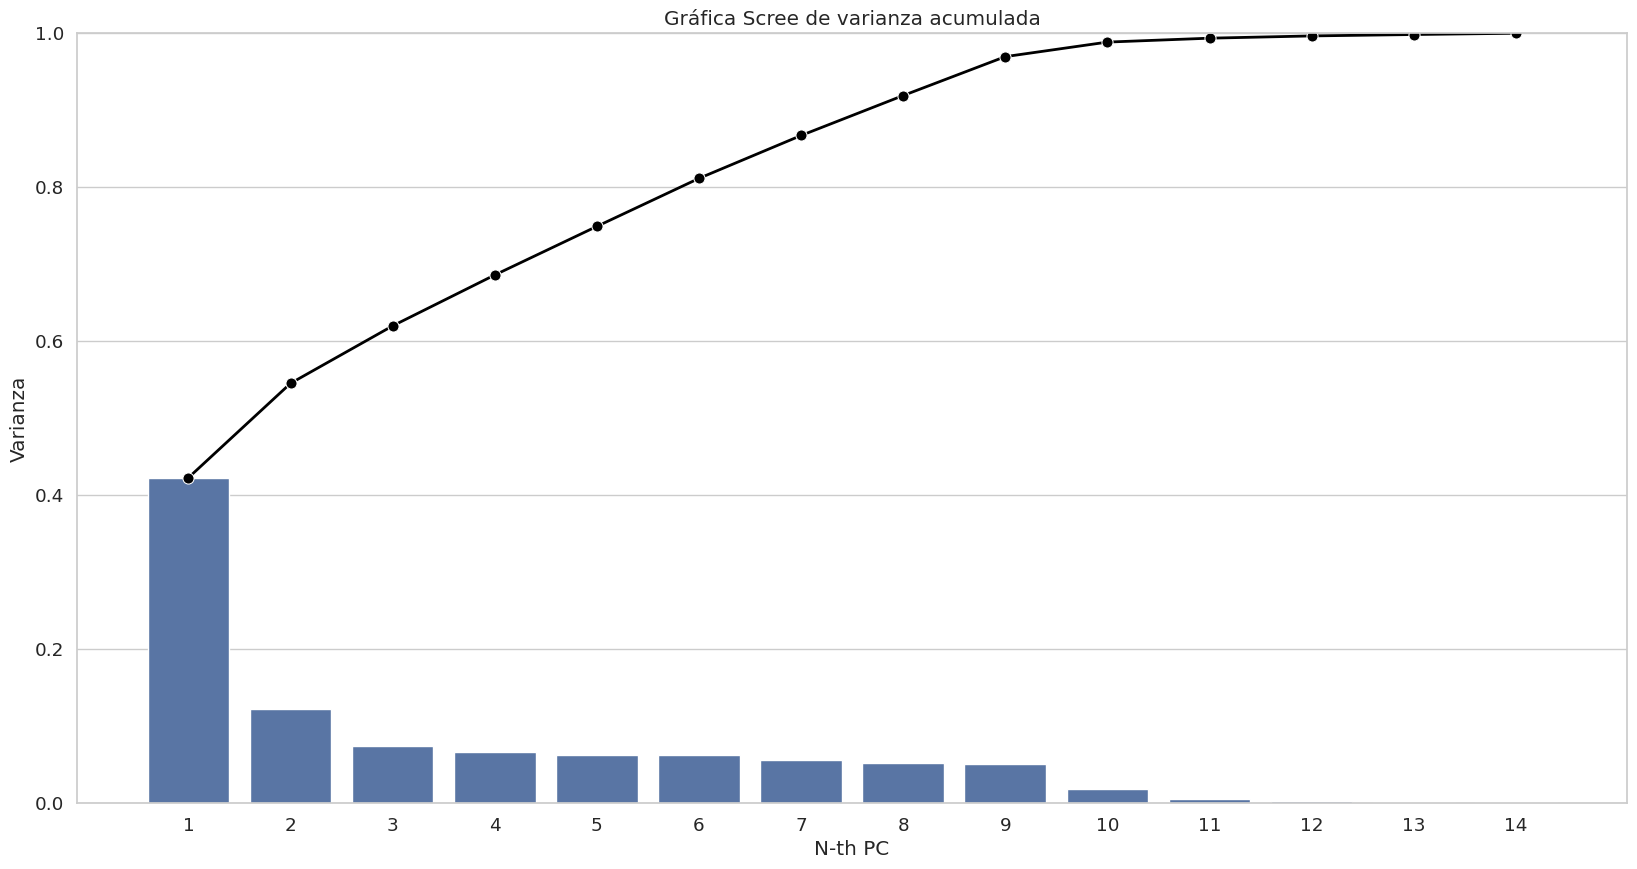

In [17]:
# También podemos visualizar la varianza acumulada en una gráfica Scree


PC_components = np.arange(pca.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(20, 10))

_ = sns.barplot(x = PC_components,
                y = pca.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pca.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Gráfica Scree de varianza acumulada')
plt.xlabel('N-th PC')
plt.ylabel('Varianza')
plt.ylim(0, 1)
plt.show()

Mapa de Calor (HeatMap)
El mapa de calor es muy util para vizualizar la contribución de cada feature en cada componente principal. Por ejemplo aquí podemos ver que los feature saldos y pagos tienen gran contribución en los primeros dos componentes

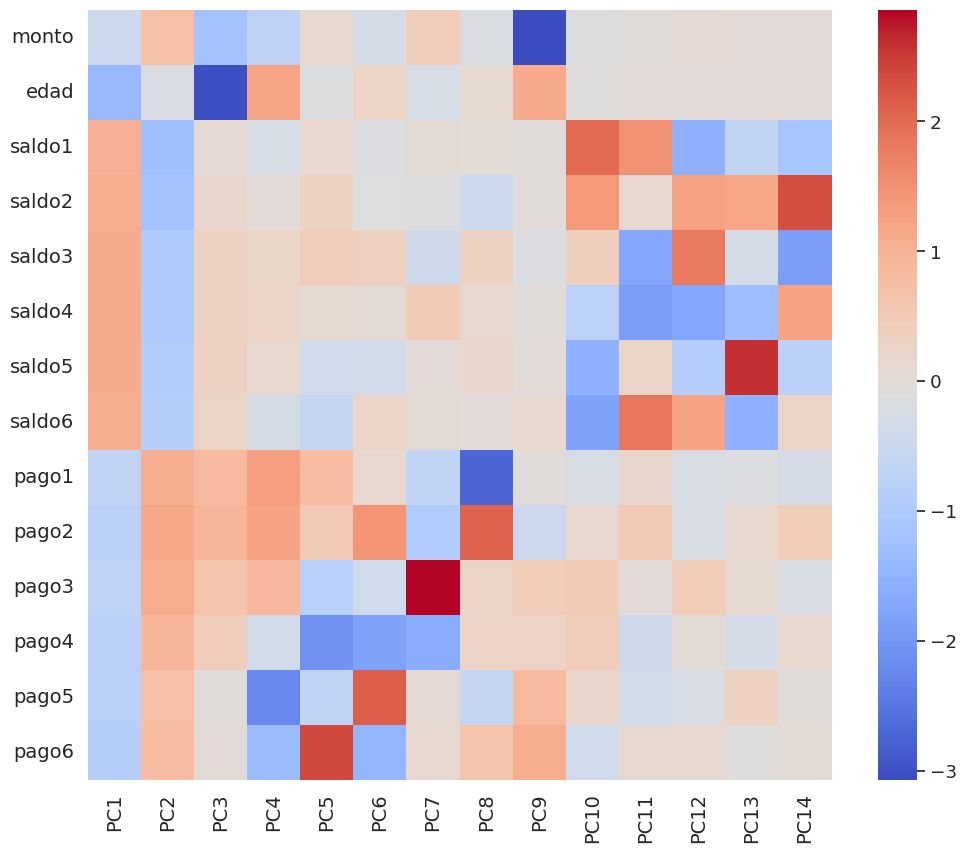

In [23]:
pcsComponents_dfX = pd.DataFrame(pca.components_.transpose(), 
                                columns = row_names,
                                index = dfNumericNormalized.columns
                                )
pcsComponents_dfX
pcsComponents_dfX_normalized=(pcsComponents_dfX-pcsComponents_dfX.mean())/(pcsComponents_dfX.std())


#Para mejor visualizar la contribución de cada dimensión original en cada componente principal, vamos a normalizar los valores de los PC.

pcsComponents_dfX_normalized=(pcsComponents_dfX-pcsComponents_dfX.mean())/(pcsComponents_dfX.std())

ax = sns.heatmap(pcsComponents_dfX_normalized, cmap="coolwarm")
ax.tick_params(labelsize=14)
ax.figure.set_size_inches((12, 10))
plt.show()